In [46]:
# Importing necessary libraries

# Nearest neighbors will be the v1 model for sound drip
# will give logistic regressiona nd 
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from joblib import dump
from joblib import load
import pickle
import numpy as np

import pandas as pd
from pandas.io.json import json_normalize

# textblob will be used to perform sentiment analysis down the road
# from textblob import TextBlob

# # Data is large and will need to be unzipped
# import zipfile

# # unzipping file
# with zipfile.ZipFile("./data_collection/final_data/DF_v1.pkl.zip","r") as zip_ref:
#     zip_ref.extractall(".")

# reading in pickled data
# song_list = pd.read_pickle("./DF_v1.pkl")

In [2]:
# ALERT - THIS COULD POTENTIALLY BE USED TO PERFORM SENTIMENT ANALYSIS ON LYRICS DATA IN v2. FOR v1, DISREGARD

# # creating polarity and subjectivity lists to be populated

# lyrics_polarity = []
# lyrics_subjectivity = []

# # using a for loop to populate polarity and subjectivity lists
# for title in song_list_df["lyrics"]:
#     try:
#         blob_test = TextBlob = TextBlob(title)
#         blob_sentiment = blob_test.sentiment
#         # appending results to lists above
#         lyrics_polarity.append(blob_sentiment[0])
#         lyrics_subjectivity.append(blob_sentiment[1])
#     except:
#         lyrics_polarity.append(0)
#         lyrics_subjectivity.append(0)

# # adding polarity and subjectivity to df
# song_list['lyrics_polarity'] = lyrics_polarity
# song_list['lyrics_subjectivity'] = lyrics_subjectivity

# Cleaning/Scaling Data

In [97]:
# song_list = pickle.load("./DF_genres_hashed.pkl","rb")

X = pickle.load(open("song_list_v4_hashed.pkl", "rb"))

In [98]:
X.head()

,songid,popularity,availability,acousticness,artist,danceability,duration_ms,energy,instrumentalness,key,...,40,41,42,43,44,45,46,47,48,49
0,5PS5dpaLogPzYU9hWiWyZb,0,1,0.001300,Karkkiautomaatti,0.487,157307.0,0.678,0.055100,9.0,...,0.0,-1.0,1.0,2.0,-3.0,0.0,0.0,0.0,0.0,-2.0
1,41RpZW2lxAdnqDd2nMBzLQ,15,1,0.000045,Hudson Mohawke,0.662,138960.0,0.823,0.952000,4.0,...,0.0,-4.0,5.0,7.0,-4.0,-1.0,0.0,0.0,0.0,-7.0
2,3GsS8jzoixpCnp4jDWCEvb,17,1,0.002760,Kris Kross,0.859,221200.0,0.741,0.000000,11.0,...,0.0,-3.0,0.0,1.0,-2.0,-1.0,0.0,0.0,0.0,-1.0
3,0kq75szR7uDEYrZkT2c4Ry,21,1,0.348000,Jorge Negrete,0.361,173573.0,0.483,0.000003,7.0,...,0.0,-2.0,1.0,2.0,-1.0,2.0,0.0,0.0,0.0,0.0
4,2HyFpkX9J7vv3OZNDaraHZ,1,1,0.340000,Tiger Lou,0.533,318467.0,0.302,0.179000,10.0,...,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,-2.0


In [109]:
# dropping unnecessary columns
X = X.drop(["songid","artist","track", "duration_ms","genres","genres_stripped", "availability"], axis=1)

# checking that they're dropped
X.shape

(574018, 63)

In [110]:
columns_for_scaling = X.columns[0:13]

In [111]:
columns_genre_hashed = X.columns[14:]

In [112]:
X[columns_for_scaling]

,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0,0.001300,0.487,0.678,0.055100,9.0,0.0846,-7.780,1.0,0.0495,149.940,4.0,0.8700
1,15,0.000045,0.662,0.823,0.952000,4.0,0.3430,-1.711,0.0,0.0662,177.745,4.0,0.6210
2,17,0.002760,0.859,0.741,0.000000,11.0,0.3250,-12.329,0.0,0.2710,98.082,4.0,0.5290
3,21,0.348000,0.361,0.483,0.000003,7.0,0.1770,-6.875,1.0,0.0287,94.538,4.0,0.6820
4,1,0.340000,0.533,0.302,0.179000,10.0,0.1110,-10.308,1.0,0.0307,134.959,3.0,0.2940
...,...,...,...,...,...,...,...,...,...,...,...,...,...
574013,33,0.798000,0.320,0.104,0.000750,0.0,0.1060,-13.162,1.0,0.0342,124.677,3.0,0.0566
574014,50,0.820000,0.418,0.204,0.936000,8.0,0.0866,-13.522,1.0,0.0370,110.022,4.0,0.0375
574015,0,0.070400,0.614,0.952,0.000000,6.0,0.3620,-2.782,1.0,0.0718,148.079,4.0,0.8200
574016,18,0.064000,0.343,0.487,0.000000,2.0,0.1070,-9.462,1.0,0.0473,171.217,4.0,0.3650


In [113]:
X[columns_genre_hashed]

,1,2,3,4,5,6,7,8,9,10,...,40,41,42,43,44,45,46,47,48,49
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,-1.0,1.0,2.0,-3.0,0.0,0.0,0.0,0.0,-2.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,-4.0,5.0,7.0,-4.0,-1.0,0.0,0.0,0.0,-7.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,-3.0,0.0,1.0,-2.0,-1.0,0.0,0.0,0.0,-1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,-2.0,1.0,2.0,-1.0,2.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,...,0.0,-6.0,1.0,9.0,-5.0,4.0,0.0,0.0,0.0,-1.0
574014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,-2.0
574015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,-2.0,3.0,6.0,-4.0,5.0,0.0,0.0,0.0,0.0
574016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,...,0.0,-6.0,2.0,10.0,-5.0,7.0,0.0,0.0,0.0,-1.0


In [114]:
# instantiating scaler
scaler = MinMaxScaler()

# scaling data
data_scaled = scaler.fit_transform(X[columns_for_scaling])

# confirming scaling took place
data_scaled[0]

array([0.        , 0.00130522, 0.4884654 , 0.678     , 0.0551    ,
       0.81818182, 0.0846    , 0.78720453, 1.        , 0.05118925,
       0.60009846, 0.8       , 0.87      ])

In [115]:
# convert hashed genre columns to np.array

genres_hashed_array = pd.DataFrame.to_numpy(X[columns_genre_hashed])

In [116]:
len(genres_hashed_array)

574018

In [117]:
data_for_model = np.concatenate((data_scaled,genres_hashed_array),axis=1)

In [118]:
data_scaled[0]

array([0.        , 0.00130522, 0.4884654 , 0.678     , 0.0551    ,
       0.81818182, 0.0846    , 0.78720453, 1.        , 0.05118925,
       0.60009846, 0.8       , 0.87      ])

In [119]:
len(data_scaled)

574018

In [120]:
# !pipenv install matplotlib

/Users/alexanderbennett/.local/share/virtualenvs/model_notebooks-FtE4iyOL/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:404: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(data[col].dropna().values, bins=bins, **kwds)


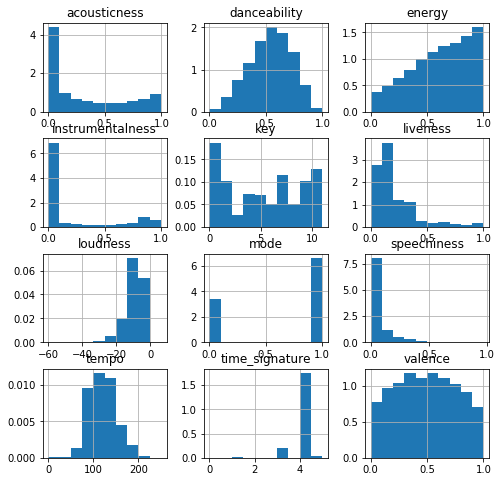

In [121]:
# Checking distribution 
import matplotlib.pyplot as plt

pd.DataFrame(X,columns=columns_for_scaling).hist(figsize=(8,8), normed=True);


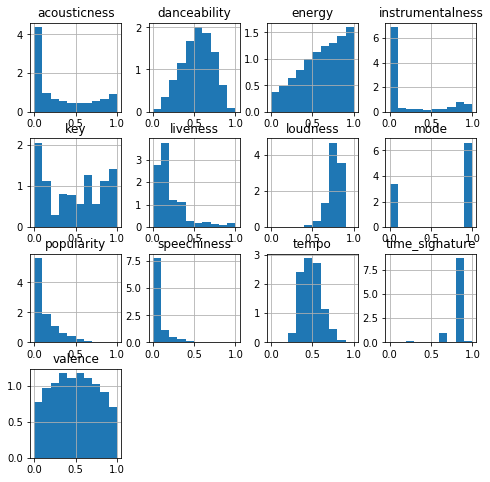

In [122]:
pd.DataFrame(data_scaled,columns=columns_for_scaling).hist(figsize=(8,8), normed=True);

Data is scaled and ready to be fed to the model

In [123]:
columns_for_scaling

Index(['popularity', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

In [140]:
data_scaled = scaler.fit_transform(X_to_normalize)

In [144]:
# normalize_cols = ['popularity','acousticness', 'danceability', 'energy',
#        'instrumentalness', 'key', 'liveness', 'loudness',
#        'speechiness', 'tempo', 'valence']

# X_to_normalize = X[normalize_cols]

transformer = Normalizer()

normalized_data = transformer.fit_transform(data_scaled)

In [145]:
print('shape before:', normalized_data.shape)
normalized_data = np.concatenate((normalized_data,X[['mode', 'tempo']]),axis=1)
print('shape after:', normalized_data.shape)

shape before: (574018, 11)
shape after: (574018, 13)


/Users/alexanderbennett/.local/share/virtualenvs/model_notebooks-FtE4iyOL/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:404: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(data[col].dropna().values, bins=bins, **kwds)


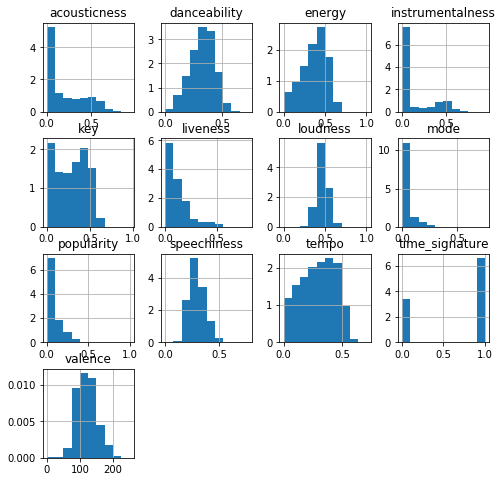

In [146]:
# Valence isn't scaled appropriately
# will have to scale before normalizing
pd.DataFrame(normalized_data,columns=columns_for_scaling).hist(figsize=(8,8), normed=True);

In [ ]:

data_scaled = scaler.fit_transform(X_to_normalize)

In [133]:
X_to_normalize.shape, X_to_normalize.columns

((574018, 11), Index(['popularity', 'acousticness', 'danceability', 'energy',
        'instrumentalness', 'key', 'liveness', 'loudness', 'speechiness',
        'tempo', 'valence'],
       dtype='object'))

In [90]:
mask = X['popularity'] == 'NaN'

X['popularity'][mask]

# X.dropna

189355    NaN
202786    NaN
Name: popularity, dtype: object

In [91]:
X.loc[[202786, 189355]]

,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,...,40,41,42,43,44,45,46,47,48,49
202786,NaN,0.0186,0.764,0.903,0.0127,0.0,0.0617,-7.324,0.0,0.0481,...,0.0,-1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,-4.0
189355,NaN,0.0769,0.603,0.914,0.0000,7.0,0.4100,-2.964,1.0,0.3420,...,0.0,0.0,2.0,1.0,-2.0,3.0,0.0,0.0,0.0,0.0


In [ ]:
# Normalize audio columns
norm = Normalizer()
tracks[audio_cols] = norm.fit_transform(tracks[audio_cols]

In [96]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

client_credentials_manager = SpotifyClientCredentials(client_id='63594c9b2f99411a8cbd18df04851fc4',client_secret='096168b2bd1f4378ae410726955c9ed8')
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
def get_popularity(trackID):
    return sp.track(trackID)['popularity']

In [100]:
get_popularity('5gNNUKhBzakQrbu8UaLori')

18

In [107]:
X.loc[202786, 'popularity'] = 18

X.loc[202786]['popularity']

18

In [101]:
get_popularity('25DO8ImBd90EhKEKuntxqN')

0

In [108]:
X.loc[189355, 'popularity'] = 0

X.loc[189355]

songid          25DO8ImBd90EhKEKuntxqN
popularity                           0
availability                       NaN
acousticness                    0.0769
artist                  Cymarshall Law
                         ...          
45                                   3
46                                   0
47                                   0
48                                   0
49                                   0
Name: 189355, Length: 70, dtype: object

# K-Nearest Neighbors Classifier w/ Data_scaled

In [38]:
# instantiating model class
knn1 = NearestNeighbors(n_neighbors=100,algorithm='kd_tree',leaf_size=10, n_jobs=-1)

# fitting model
model_1 = knn1.fit(data_scaled)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [36]:
# running model to test output
knn_results1 = knn1.kneighbors([data_for_model[1]])[1]

In [37]:
knn_results1[0]

array([     1,   7356, 439313, 324065,  46615, 189867, 353040, 386550,
       280660, 183275,  29886, 432767,  41466, 399202, 254445, 155284,
       387436,  17106,  15114, 441859,   1045, 350728, 149636, 458456,
       174122, 310774, 549500,  35057,  67702, 344390, 566236,  12992,
       111855, 422635, 252448,  51503, 568655, 562878, 427820,  89371,
       279931, 299717, 135978, 481752, 458372,  50850, 405522, 268485,
       426595,  75465, 359693, 271586, 565269, 564789, 340999, 128995,
       311481, 408332,  30138, 439880,  78332, 338732, 226326, 453043,
        15768,  48928, 554143, 307580, 211179, 408543, 565282, 240398,
       116466, 395982,  20943, 230483,  38820, 232721, 481774, 437023,
       375544, 317411, 178735,   3646, 560394,  67778, 452724, 481644,
       481796, 458981, 407104, 431163, 302751, 501196, 481791, 230276,
       257363, 487102, 499112, 497658])

In [100]:
pd.DataFrame(song_list.loc[1005][1:11])

,1005
artist,Jean-michel Rotin
danceability,0.64
duration_ms,256133
energy,0.784
instrumentalness,0.0163
key,1
liveness,0.0355
loudness,-9.452
mode,1
songid,1uR9ohf3yyH1nygTAqqksv


In [29]:
counter = 0
for result in knn_results1[0]:
    counter += 1
    print(counter)
    display(pd.DataFrame(song_list.loc[result][10:11]),pd.DataFrame(song_list.loc[result][17:18]))

1


,1
songid,41RpZW2lxAdnqDd2nMBzLQ


,1
genres_stripped,"'bass music', 'scottish electronic', 'scottish..."


2


,7356
songid,5KrT43gJer7GAmW7lzDswI


,7356
genres_stripped,"'bass music', 'scottish electronic', 'scottish..."


3


,439313
songid,5jHWYX0vFoCTo9Vfi2oL5Y


,439313
genres_stripped,"'bass music', 'scottish electronic', 'scottish..."


4


,324065
songid,3niLZux4YrPkROBiQ5n10L


,324065
genres_stripped,"'bass music', 'scottish electronic', 'scottish..."


5


,46615
songid,2ELdgpcrH5KTT3aZRjOFzq


,46615
genres_stripped,"'bass music', 'scottish electronic', 'scottish..."


6


,189867
songid,6GyahSBWjd9NOdVmnZdBwL


,189867
genres_stripped,"'bass music', 'scottish electronic', 'scottish..."


7


,353040
songid,5HfSwVjTloGEAluKw3T3nh


,353040
genres_stripped,"'bass music', 'scottish electronic', 'scottish..."


8


,386550
songid,6iHHO8hU7viCgZyU3LYi4i


,386550
genres_stripped,"'bass music', 'scottish electronic', 'scottish..."


9


,280660
songid,6SWvFS3J48z1eED88Htg2x


,280660
genres_stripped,"'bass music', 'scottish electronic', 'scottish..."


10


,183275
songid,3xVIcDuxudSY3Vcvx02pcl


,183275
genres_stripped,"'bass music', 'scottish electronic', 'scottish..."


11


,29886
songid,5U9yhINyd8DQzKOAcL3KxZ


,29886
genres_stripped,"'bass music', 'scottish electronic', 'scottish..."


12


,432767
songid,2VYLZO3LakAgSWK9DTLWE3


,432767
genres_stripped,"'bass music', 'scottish electronic', 'scottish..."


13


,41466
songid,4g0iPH8W6MVIIsDmOma48J


,41466
genres_stripped,"'bass music', 'scottish electronic', 'scottish..."


14


,399202
songid,4Q2ghKdoEfrpleKAG03a5R


,399202
genres_stripped,"'bass music', 'scottish electronic', 'scottish..."


15


,254445
songid,0b2C1ICFJI0fT9E2iGmr7z


,254445
genres_stripped,"'bass music', 'scottish electronic', 'scottish..."


16


,155284
songid,0lo18DoW62vTW9uyosl8aA


,155284
genres_stripped,"'bass music', 'scottish electronic', 'scottish..."


17


,387436
songid,1ymVpc3PgmD4Fi5Udid5bS


,387436
genres_stripped,"'bass music', 'scottish electronic', 'scottish..."


18


,17106
songid,23IEkPgj3yKSezDtVwXRO9


,17106
genres_stripped,"'christian hardcore', 'christian metal', 'chri..."


19


,15114
songid,3aqjFps7jPIm19ZgU89q3C


,15114
genres_stripped,"'christian hardcore', 'christian metal', 'chri..."


20


,441859
songid,7GQgq7XsWDk45inpqiiFmD


,441859
genres_stripped,"'christian hardcore', 'christian metal', 'chri..."


21


,1045
songid,5xvdmEWWwOIL62y2hhAm6D


,1045
genres_stripped,"'christian hardcore', 'christian metal', 'chri..."


22


,350728
songid,7mK8yTpEIQn61QwxerM26P


,350728
genres_stripped,"'christian hardcore', 'christian metal', 'chri..."


23


,149636
songid,4KPgC2TCQCLtCfp4cdzldU


,149636
genres_stripped,"'christian hardcore', 'christian metal', 'chri..."


24


,458456
songid,0FzuPWVhwxXV80frodqvW0


,458456
genres_stripped,"'christian hardcore', 'christian metal', 'chri..."


25


,174122
songid,60UJqxsc6OEPW5av8nm76Z


,174122
genres_stripped,"'dance rock', 'new wave', 'pub rock', 'punk', ..."


26


,310774
songid,5iQBW6NsbIajPStowBzlHr


,310774
genres_stripped,"'dance rock', 'new wave', 'pub rock', 'punk', ..."


27


,549500
songid,6gvlSiOrZQ4tIWquhRTC2W


,549500
genres_stripped,"'acoustic pop', 'indie poptimism', 'indiecoust..."


28


,35057
songid,14HnOjrW7n7sPxwWeVHyMa


,35057
genres_stripped,"'dance rock', 'new wave', 'pub rock', 'punk', ..."


29


,67702
songid,1Z91FEriJl65YpcC3gUe0V


,67702
genres_stripped,"'dance rock', 'new wave', 'pub rock', 'punk', ..."


30


,344390
songid,3IQwoqHZzeRqEYZ4mp1gtA


,344390
genres_stripped,"'dance rock', 'new wave', 'pub rock', 'punk', ..."


31


,566236
songid,4oRs3pEcVAcSFHT7bmTEbn


,566236
genres_stripped,"'acoustic pop', 'indie poptimism', 'indiecoust..."


32


,12992
songid,14I88JNyQCmpRE4yyTG2UM


,12992
genres_stripped,"'dance rock', 'new wave', 'pub rock', 'punk', ..."


33


,111855
songid,0PPPfp5Dh161uvyMyGa8f9


,111855
genres_stripped,"'acoustic pop', 'indie poptimism', 'indiecoust..."


34


,422635
songid,0Bc3ylX9HTk1PSKcnCbxPV


,422635
genres_stripped,"'celtic', 'celtic rock', 'irish folk', 'scotti..."


35


,252448
songid,2Ff7Dg6JAwPIUAdXI5Guni


,252448
genres_stripped,"'dance rock', 'new wave', 'pub rock', 'punk', ..."


36


,51503
songid,6KvPKYe8RclinEaDRkXbMr


,51503
genres_stripped,"'dance rock', 'new wave', 'pub rock', 'punk', ..."


37


,568655
songid,38LC7jHjifqs5EnYUv4BgG


,568655
genres_stripped,"'acoustic pop', 'indie poptimism', 'indiecoust..."


38


,562878
songid,7zb2TzZwpXuBJutFIqS6lA


,562878
genres_stripped,"'acoustic pop', 'indie poptimism', 'indiecoust..."


39


,427820
songid,5SFhVhAQJRvvN7GORknxF7


,427820
genres_stripped,"'dance rock', 'new wave', 'pub rock', 'punk', ..."


40


,89371
songid,6lSdwBLfPh0BtMqMUknUP2


,89371
genres_stripped,"'dance rock', 'new wave', 'pub rock', 'punk', ..."


41


,279931
songid,4c4RpS77mg4GiwNvrNumsD


,279931
genres_stripped,"'dance rock', 'new wave', 'pub rock', 'punk', ..."


42


,299717
songid,5bOfw0AAIHLzNQUuiubrjG


,299717
genres_stripped,"'dance rock', 'new wave', 'pub rock', 'punk', ..."


43


,135978
songid,53LtFw6btRiDCPYN3Zl7Ty


,135978
genres_stripped,"'dance rock', 'new wave', 'pub rock', 'punk', ..."


44


,481752
songid,3BXlmHqou6hZiOyi8JXfGt


,481752
genres_stripped,"'acoustic pop', 'indie poptimism', 'indiecoust..."


45


,458372
songid,2XIs3A5GWPBkKuHHa93GWa


,458372
genres_stripped,"'dance rock', 'new wave', 'pub rock', 'punk', ..."


46


,50850
songid,02J1wOF7CNCy54RYZisapo


,50850
genres_stripped,"'dance rock', 'new wave', 'pub rock', 'punk', ..."


47


,405522
songid,110YR9ek5JgX48MyH3JGgL


,405522
genres_stripped,"'dance rock', 'new wave', 'pub rock', 'punk', ..."


48


,268485
songid,6ensQTx2BBv3LZtpT8WG5j


,268485
genres_stripped,"'dance rock', 'new wave', 'pub rock', 'punk', ..."


49


,426595
songid,4gYU71fEqlyHJHwPGzDccM


,426595
genres_stripped,"'dance rock', 'new wave', 'pub rock', 'punk', ..."


50


,75465
songid,3zUD6oNgG38gsCslj45qk8


,75465
genres_stripped,"'dance rock', 'new wave', 'pub rock', 'punk', ..."


51


,359693
songid,2iVBsAG8lsr4QK3WmONHW2


,359693
genres_stripped,"'dance rock', 'new wave', 'pub rock', 'punk', ..."


52


,271586
songid,5ZhKLY1XWcsf6je7PGeklh


,271586
genres_stripped,"'dance rock', 'new wave', 'pub rock', 'punk', ..."


53


,565269
songid,7H3nOoaHiPJPKadrHcMiex


,565269
genres_stripped,"'acoustic pop', 'indie poptimism', 'indiecoust..."


54


,564789
songid,0vy1K9FhCK8woHW7MKEcBG


,564789
genres_stripped,"'acoustic pop', 'indie poptimism', 'indiecoust..."


55


,340999
songid,5m5B8cPYS3vPt96gAQ6EWL


,340999
genres_stripped,"'dance rock', 'new wave', 'pub rock', 'punk', ..."


56


,128995
songid,3OGUFuRv3YQt1eWJ7LHirJ


,128995
genres_stripped,"'dance rock', 'new wave', 'pub rock', 'punk', ..."


57


,311481
songid,5vgd0awtV6RQBLAaNTIZHO


,311481
genres_stripped,"'dance rock', 'new wave', 'pub rock', 'punk', ..."


58


,408332
songid,1khsxsVlUd6cJHcGswLZeT


,408332
genres_stripped,"'dance rock', 'new wave', 'pub rock', 'punk', ..."


59


,30138
songid,2QSD3K3b3BJ8DPhGhQfDPW


,30138
genres_stripped,"'dance rock', 'new wave', 'pub rock', 'punk', ..."


60


,439880
songid,59HLQN83JIhVDIrx6SaswJ


,439880
genres_stripped,"'dance rock', 'new wave', 'pub rock', 'punk', ..."


61


,78332
songid,0Ai7iCjk1wLS4pLj41Inos


,78332
genres_stripped,"'dance rock', 'new wave', 'pub rock', 'punk', ..."


62


,338732
songid,7ngbS7HGJoRqbQpSyzrDwh


,338732
genres_stripped,"'acoustic pop', 'indie poptimism', 'indiecoust..."


63


,226326
songid,1rcFWpAvaHsoWJQB2DQ0EJ


,226326
genres_stripped,"'dance rock', 'new wave', 'pub rock', 'punk', ..."


64


,453043
songid,6JTdV0a0xoPJvyq7ZQV9d6


,453043
genres_stripped,"'dance rock', 'new wave', 'pub rock', 'punk', ..."


65


,15768
songid,4cuYVNYNtmBIjLDk9SmshM


,15768
genres_stripped,"'dance rock', 'new wave', 'pub rock', 'punk', ..."


66


,48928
songid,2FkhmoXtlNHBDfQxS2onV2


,48928
genres_stripped,"'dance rock', 'new wave', 'pub rock', 'punk', ..."


67


,554143
songid,42vUVhViZsyIp2Cw03NKmN


,554143
genres_stripped,"'acoustic pop', 'indie poptimism', 'indiecoust..."


68


,307580
songid,1P5Fh5atqaEnyNjoSxPKF4


,307580
genres_stripped,"'acoustic pop', 'indie poptimism', 'indiecoust..."


69


,211179
songid,4XR0g0olgdBqylNtLkH90n


,211179
genres_stripped,"'dance rock', 'new wave', 'pub rock', 'punk', ..."


70


,408543
songid,2RniHAiLy58MNPfE77tl2Q


,408543
genres_stripped,"'dance rock', 'new wave', 'pub rock', 'punk', ..."


71


,565282
songid,68xJcsjiNqoqG18FzHvUDu


,565282
genres_stripped,"'acoustic pop', 'indie poptimism', 'indiecoust..."


72


,240398
songid,2fQE3tSQ4sCUKpTLjdxt8u


,240398
genres_stripped,"'dance rock', 'new wave', 'pub rock', 'punk', ..."


73


,116466
songid,1xhjTVTlmBmAFIhNNNRdKO


,116466
genres_stripped,"'acoustic pop', 'indie poptimism', 'indiecoust..."


74


,395982
songid,3TA0oN8l6FwF7tlGfijStg


,395982
genres_stripped,"'dance rock', 'new wave', 'pub rock', 'punk', ..."


75


,20943
songid,2wuIPyHgN0jCFXtR4tN39z


,20943
genres_stripped,"'dance rock', 'new wave', 'pub rock', 'punk', ..."


76


,230483
songid,4fBzC8XRwt4TX0k0EFQYHH


,230483
genres_stripped,"'acoustic pop', 'indie poptimism', 'indiecoust..."


77


,38820
songid,09b5vch8cDyMN8vYA2lEwk


,38820
genres_stripped,"'acoustic pop', 'indie poptimism', 'indiecoust..."


78


,232721
songid,5lOCaZYfzvLBt9mPmgXJmM


,232721
genres_stripped,"'dance rock', 'new wave', 'pub rock', 'punk', ..."


79


,481774
songid,6ZqL4HwhuWXuDiQTcVw6QV


,481774
genres_stripped,"'acoustic pop', 'indie poptimism', 'indiecoust..."


80


,437023
songid,4tG1L2bTeOWkVSWX5IbRHx


,437023
genres_stripped,"'dance rock', 'new wave', 'pub rock', 'punk', ..."


81


,375544
songid,6VcXyVkrGY194qkYX6XqAl


,375544
genres_stripped,"'dance rock', 'new wave', 'pub rock', 'punk', ..."


82


,317411
songid,4MRj97HBBsSD9quMCOB20s


,317411
genres_stripped,"'dance rock', 'new wave', 'pub rock', 'punk', ..."


83


,178735
songid,7HlIELWcQLib94pEAm6fVQ


,178735
genres_stripped,"'acoustic pop', 'indie poptimism', 'indiecoust..."


84


,3646
songid,3jMKQlVn5sEcOk6VdpEvlu


,3646
genres_stripped,"'dance rock', 'new wave', 'pub rock', 'punk', ..."


85


,560394
songid,2dMkrhsWFVP2rHZmTEKkeh


,560394
genres_stripped,"'acoustic pop', 'indie poptimism', 'indiecoust..."


86


,67778
songid,3bR5ZAkI5pt31v8qAQocYD


,67778
genres_stripped,"'acoustic pop', 'indie poptimism', 'indiecoust..."


87


,452724
songid,30kVifNRTodm0jkDQAtKVm


,452724
genres_stripped,"'acoustic pop', 'indie poptimism', 'indiecoust..."


88


,481644
songid,5cqZN7rPIwFOie4mpJ6SJY


,481644
genres_stripped,"'acoustic pop', 'indie poptimism', 'indiecoust..."


89


,481796
songid,035CqRcthbyYSIZuqhkMgv


,481796
genres_stripped,"'acoustic pop', 'indie poptimism', 'indiecoust..."


90


,458981
songid,7k5cuk5o3Q3ueiwOXrFWpp


,458981
genres_stripped,"'acoustic pop', 'indie poptimism', 'indiecoust..."


91


,407104
songid,46aWNIBOTOTKObtHu4ejVD


,407104
genres_stripped,"'acoustic pop', 'indie poptimism', 'indiecoust..."


92


,431163
songid,7kHD0VssDJgYUoFQEATgf8


,431163
genres_stripped,"'celtic', 'celtic rock', 'irish folk', 'scotti..."


93


,302751
songid,46wofYWWNwmdyPgVHT81R7


,302751
genres_stripped,"'acoustic pop', 'indie poptimism', 'indiecoust..."


94


,501196
songid,6CpRE5o5sXPajgPP6O1tjS


,501196
genres_stripped,"'acoustic pop', 'anthem worship', 'christian i..."


95


,481791
songid,2mvXHQJ6ySMOQSQmjswkMV


,481791
genres_stripped,"'acoustic pop', 'indie poptimism', 'indiecoust..."


96


,230276
songid,3Exg4XPdFuCdbKEFG0cEoQ


,230276
genres_stripped,"'acoustic pop', 'anthem worship', 'christian i..."


97


,257363
songid,33dVEqsu2V7zvCIgid8PnF


,257363
genres_stripped,"'acoustic pop', 'indie poptimism', 'indiecoust..."


98


,487102
songid,1Y7pZRTEkdW3lysdcFEdcE


,487102
genres_stripped,"'acoustic pop', 'indie poptimism', 'indiecoust..."


99


,499112
songid,4u10TdQrpMjcPsYZA9tUxI


,499112
genres_stripped,"'acoustic pop', 'anthem worship', 'christian i..."


100


,497658
songid,7DLzu8CrPIl64bcbw150F1


,497658
genres_stripped,"'acoustic pop', 'anthem worship', 'christian i..."


# Model w/out Hashed Genres

In [30]:
# instantiating model class
knn2 = NearestNeighbors(n_neighbors=21,algorithm='kd_tree')

# fitting model
model2 = knn2.fit(data_scaled)

In [31]:
# running model to test output
knn_results2 = knn2.kneighbors([data_scaled[1]])[1]

In [32]:
knn_results2[0]

array([     1, 492393, 407590, 445580, 238362, 385085, 559862, 535388,
       198289,  36970, 350778,  68090, 436203,  75609,  67393, 495177,
       286524, 192022, 436810,  93001, 530514])

In [33]:
pd.DataFrame(song_list.loc[1005][1:11])

,1005
artist,Jean-michel Rotin
danceability,0.64
duration_ms,256133
energy,0.784
instrumentalness,0.0163
key,1
liveness,0.0355
loudness,-9.452
mode,1
songid,1uR9ohf3yyH1nygTAqqksv


In [34]:
counter = 0 
for result in knn_results2[0]:
    counter += 1 
    print(counter)
    display(pd.DataFrame(song_list.loc[result][10:11]),pd.DataFrame(song_list.loc[result][17:18]))

1


,1
songid,41RpZW2lxAdnqDd2nMBzLQ


,1
genres_stripped,"'bass music', 'scottish electronic', 'scottish..."


2


,492393
songid,0O3db9x93twYwR8ckduDc2


,492393
genres_stripped,"'drum and bass', 'liquid funk', 'uk dnb'"


3


,407590
songid,1uHmO3Uo9pkJ8uii3f8E9y


,407590
genres_stripped,"'darkstep', 'drum and bass', 'liquid funk', 'n..."


4


,445580
songid,4iB8tsFTPqOAnrCBsz3Baa


,445580
genres_stripped,"'chillhop', 'downtempo', 'electronica', 'ninja..."


5


,238362
songid,23z6WXALRFTeEwA25kQJNT


,238362
genres_stripped,"'electropop', 'metropopolis', 'swedish alterna..."


6


,385085
songid,4DHZWAshPCZkYHC64UoLeK


,385085
genres_stripped,"'electro jazz', 'electro swing', 'electronica'..."


7


,559862
songid,5570AOqQfWpmHAcRVywpcE


,559862
genres_stripped,"'progressive house', 'progressive trance', 'up..."


8


,535388
songid,2biS8aAzmYUl6cIbJKkxrL


,535388
genres_stripped,"'chillhop', 'jazz boom bap'"


9


,198289
songid,4QxWH1nRVPlThJUGi8XlaQ


,198289
genres_stripped,"'electro jazz', 'nu jazz'"


10


,36970
songid,1EyR9ykNVYuhBiMi14Bg7x


,36970
genres_stripped,"'alternative hip hop', 'boom bap', 'east coast..."


11


,350778
songid,4QVcr63WEHP9ofwDs3vAhn


,350778
genres_stripped,"'drill and bass', 'electronica', 'glitch', 'in..."


12


,68090
songid,3GlkjwXjM5Bgfz4lNfbFUz


,68090
genres_stripped,"'dub', 'reggae', 'rock steady', 'roots reggae'..."


13


,436203
songid,2bx3heulXGe3D2MoICVw8F


,436203
genres_stripped,"'reggae en espanol', 'spanish reggae'"


14


,75609
songid,1GA5a4fprKfOhfoM0RI5iw


,75609
genres_stripped,"'acid trance', 'bubble trance'"


15


,67393
songid,7MUVlI2my9eh78SGEBzF8M


,67393
genres_stripped,'full on'


16


,495177
songid,1G9l5r5Fc65J7DZPAEk5lA


,495177
genres_stripped,"'catstep', 'kawaii future bass', 'otacore'"


17


,286524
songid,6t9aQLS7yu3Wwl0cNyVEy1


,286524
genres_stripped,"'deep jazz fusion', 'jazz fusion'"


18


,192022
songid,0heb17V634CHk3dSs0wwJM


,192022
genres_stripped,"'frankfurt electronic', 'future ambient'"


19


,436810
songid,03cIxujvTyV0sNShMoONGH


,436810
genres_stripped,"'downtempo', 'livetronica', 'new tribe', 'psyc..."


20


,93001
songid,22gpJ3mnSYHm964wFPNgeW


,93001
genres_stripped,"'ambient psychill', 'psychill'"


21


,530514
songid,6brdygAtfqp3KDceaBLDZv


,530514
genres_stripped,"'dub', 'reggae', 'roots reggae'"


# Pickling model

In [8]:
import pickle

filename = './models/knn_model_v1.pkl'
pickle.dump(model, open(filename, 'wb'))

In [9]:
# pulling in the (now) pickled model
model_pickle = pickle.load(open(filename, 'rb'))

In [10]:
# Loading model to test on scaled data (not pickled data)
pickle_results = model_pickle.kneighbors([data_scaled[1000]])[1]

# displaying output
pickle_results

array([[  1000, 647630, 304823, 412399,  48174, 411195, 240739, 537833,
         50765, 450355, 151925, 707048, 557285, 508280, 175165, 510531,
        652499, 267268, 161932, 587960,  79755]])

# Pickling Scaled Data

In [11]:
filename2 = './data_scaled.pkl'
pickle.dump(data_scaled, open(filename2, 'wb'))

# (OLD) Testing both pickles for dataset, model

In [12]:
# importing libraries (even though they are visible above)
# to illustrate which packages are needed to create the function below

import pandas as pd 
from sklearn.neighbors import NearestNeighbors
import pickle


# this function predicts on a song id

def predict(id):
    #loads in pickled data and model
    X = pickle.load(open('./data_scaled.pkl', 'rb'))
    loaded_pickle = pickle.load(open('./models/knn_model_v1.pkl', 'rb'))
    #calculates results
    results = loaded_pickle.kneighbors([X[id]])[1]
    return results

In [13]:
predict(0)

array([[     0, 341644, 462704, 499704, 105639, 347586,  27005, 553442,
        594846, 273222, 636137, 218622, 375716,  40341, 510427, 518171,
        209537, 168110, 453579, 456931,  89949]])

In [14]:
content = {
    "audio_features": {
        "acousticness": 0.934,
        "danceability": 0.186,
        "energy": 0.107,
        "instrumentalness": 0,
        "key": 5,
        "liveness": 0.297,
        "loudness": -14.802,
        "mode": 1,
        "speechiness": 0.0347,
        "tempo": 107.095,
        "time_signature": 4,
        "valence": 0.149
    }
}

In [15]:
dataframe = pd.DataFrame.from_dict(
        json_normalize(content['audio_features']),
                                orient='columns')

In [16]:
dataframe

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.934,0.186,0.107,0,5,0.297,-14.802,1,0.0347,107.095,4,0.149


In [17]:
dataframe_scaled = scaler.transform(dataframe)

dataframe_scaled

array([[0.937751  , 0.18655968, 0.107     , 0.        , 0.45454545,
        0.297     , 0.68134949, 1.        , 0.03584711, 0.42840913,
        0.8       , 0.149     ]])

In [22]:
import pickle

filename = './models/scaler.pkl'
pickle.dump(scaler, open(filename, 'wb'))

In [14]:
target = 'songid'

song_id_array = song_list[target]

In [15]:
song_id_array

0         5PS5dpaLogPzYU9hWiWyZb
1         41RpZW2lxAdnqDd2nMBzLQ
2         2poHURuOfVNbzZdivAwtOH
3         1jg9hZnReygpBvV2axGuPy
4         3GsS8jzoixpCnp4jDWCEvb
                   ...          
116091    1xm8J6EFMA6N8JDqH8vzuz
116238    4NwmHBjPb9i9N3naLCMVCG
116261    5Xo8AsEz0gpW6Rpo2jXvBN
116308    4Fnz6vDqufd3ens0Gf9LC5
116324    2tolmRzbUfgL5KRplIqHlu
Name: songid, Length: 728156, dtype: object

In [16]:
sys.getsizeof(song_id_array)

NameError: name 'sys' is not defined

In [17]:
song_id_list = song_id_array.tolist()

In [37]:
sys.getsizeof(song_id_list)

5825312

In [39]:
import pickle

filename = 'Flask_API/SOUNDDRIP/data/song_id_array.pkl'
pickle.dump(song_id_array, open(filename, 'wb'))

In [30]:
import pickle

filename = 'song_id_list2.pkl'
pickle.dump(song_id_list, open(filename, 'wb'))

In [3]:
content = {
    "audio_features": {
        "acousticness": 0.934,
        "danceability": 0.186,
        "energy": 0.107,
        "instrumentalness": 0,
        "key": 5,
        "liveness": 0.297,
        "loudness": -14.802,
        "mode": 1,
        "speechiness": 0.0347,
        "tempo": 107.095,
        "time_signature": 4,
        "valence": 0.149
    }
}

def predict(content):
    print('Loading dataframe...')
    dataframe = pd.DataFrame.from_dict(
        json_normalize(content['audio_features']),
                                orient='columns')
    print('Dataframe Object Created')
    print('Loading pickled scaler...')
    scaler = pickle.load(open('models/scaler.pkl', 'rb'))
    print('Pickled scaler loaded')
    print('Scaling dataframe object...')
    dataframe_scaled = scaler.transform(dataframe)
    print('Dataframe scaled')
    print('Loading pickled model...')
    model = pickle.load(open('./models/knn_model_v1.pkl', 'rb'))
    print('Model loaded')
    results = model.kneighbors([dataframe_scaled][0])[1]
    print('Prediction executed')

    return results


In [4]:
predict(content)

Loading dataframe...
Dataframe Object Created
Loading pickled scaler...


NameError: name 'pickle' is not defined

In [127]:
  # For-loop for returning 20 songs
def all_similarities(data_result):
    similar_songs = []
    print('song_id_list loading...')
    song_id_list = pickle.load(open('Flask_API/SOUNDDRIP/data/song_id_list.pkl', 'rb'))
    print('song_id_list loaded')
    print('beginning for loop...')
    
    for song_row in data_result[0][1:]:
        song_id = song_id_list[song_row]
        similar_songs.append({'similarity': [.99], 'values': song_id})
    json_dict = {"songs": similar_songs}
    return json_dict

In [128]:
all_similarities(predict(content))

Loading dataframe...
Dataframe Object Created
Loading pickled scaler...
Pickled scaler loaded
Scaling dataframe object...
Dataframe scaled
Loading pickled model...
Model loaded
Prediction executed
song_id_list loading...
song_id_list loaded
beginning for loop...


{'songs': [{'similarity': [0.99], 'values': '3JeSeOxS09vw7ZaQXyDtkn'},
  {'similarity': [0.99], 'values': '0lkEvsJLWu7HjurNUnMYqt'},
  {'similarity': [0.99], 'values': '7GrCeh9O4Salm3oEoiDWmf'},
  {'similarity': [0.99], 'values': '705JQ49YZOupAYQXrny5Vb'},
  {'similarity': [0.99], 'values': '7v6maEWDjrKHQMVFoL8Tq3'},
  {'similarity': [0.99], 'values': '6pJeuRa8dj6Hph2r9Unn5H'},
  {'similarity': [0.99], 'values': '1XsXX5Q8mCdlDjroYAUs8r'},
  {'similarity': [0.99], 'values': '6nl7z8eqCRRNSPJevUg5yJ'},
  {'similarity': [0.99], 'values': '4Swt07x4GyojZApyerQ8Ta'},
  {'similarity': [0.99], 'values': '68PGQTrsU7NTe6hfcFD3Fh'},
  {'similarity': [0.99], 'values': '5jTnsVnWuxdSQnRv124hwL'},
  {'similarity': [0.99], 'values': '5YsyWAtEDsStifCxF5d7wJ'},
  {'similarity': [0.99], 'values': '4RKMHiQ1sQCJVcPEbqcXR2'},
  {'similarity': [0.99], 'values': '7dXTqzYBW6LcuMvfmhKjeS'},
  {'similarity': [0.99], 'values': '1pQPfwF8yZejKeu2rZOIwI'},
  {'similarity': [0.99], 'values': '2ydHMFR78xJCTaUSgQsY1d'},

In [111]:
sorted_list = sorted(similarities, key=lambda i: i['similarity'], 
                                                         reverse=True)[:20]
      json_dict = {"songs": sorted_list}
      #data = json.dumps(json_dict)
      return jsonify(json_dict), print('yay')

'70jVRf1KHVa4eROjpdmaja'

# Get Spotify API Token / Output Audio Features

In [1]:
import spotipy
import spotipy.util as util

In [2]:
USERNAME = 'augt12ocf9csxa4s8kbq9reg8' #your spotify username
CLIENT_ID = 'b954b92b9a674e6a9cf7322649da82d1' #set at your developer account
CLIENT_SECRET = '920cd41023994b1a99210243ce8967b2' #set at your developer account
REDIRECT_URI = 'https://google.com/' #set at your developer account, usually "http://localhost:8000"
SCOPE = 'user-library-read' # or else
# ps. REDIRECT_URI is crucial here. if http://localhost:8000 is not set, or with a single '/' misplaced, it will generate a connection error.

# then pass them:

token = util.prompt_for_user_token(username = USERNAME, 
                                   scope = SCOPE, 
                                   client_id = CLIENT_ID, 
                                   client_secret = CLIENT_SECRET, 
                                   redirect_uri = REDIRECT_URI)

if token:
   sp = spotipy.Spotify(auth=token)



            User authentication requires interaction with your
            web browser. Once you enter your credentials and
            give authorization, you will be redirected to
            a url.  Paste that url you were directed to to
            complete the authorization.

        
Opened https://accounts.spotify.com/authorize?client_id=b954b92b9a674e6a9cf7322649da82d1&response_type=code&redirect_uri=https%3A%2F%2Fgoogle.com%2F&scope=user-library-read in your browser




Enter the URL you were redirected to:  https://www.google.com/?code=AQB6_guH_Q9DO3bhNcW534HrKK8bs0qvOZuuUDkWgYuzBXz-cdVz2uFdXlFM4X3nkXIfZ-yyx5-LVeSxJWtGp5j6cH3PhdznuNqVhfrh02QG0eF38xbO-UiPvtFg-lfr6FudpyjfwIQouNkiDbe6SfGR4yEM_MV7SBFEZ3FA7sWicsF7vXl38ekWg9Qui4D_Awk0pdBTDVkbFAwT


In [4]:
token

'BQAzm9VZMwr75qsRL2WkGWTyRVqFn9OYXIEFEzlOZfijT07_L8W5VBu0KymszA5Eg3n2_4np7yS6zibHQnfDt-DS8GZQ-7heWLAh51v4J15HzBCZhMdLJYZKgVq8aPaWU6Rfj52bmNPKnIUCvClGq-ixU2Laml5q_oUZwN7-sPko'

In [7]:
token_content = {'token': token}

In [8]:
type(token_content)

dict

In [9]:
token_content['token']

'BQAuxAqZlqyiBIPC-2MnrYjFH2amjQm8tLkh_ZYI_HkJ8MUHepG_lQrofpN--fGXM8b3tfXMfshOUvoF2Dkuh8iCepPvIvXqxCfrfSi52Rr8Njq0cnyLpde4_xo1v0-lMDjpMpeEOccK7yV_PPBVadskMoOr'

In [10]:
def get_id(token):
    sp = spotipy.Spotify(auth=token)
    results = sp.current_user_saved_tracks()
    song_id = results['items'][0]['track']['id']
    return song_id

In [11]:
def get_features(song_id):
    results_dict = sp.audio_features(song_id)[0]
    audio_features = {"audio_features":{key: results_dict[key] for key in results_dict.keys() & {'danceability', 'energy',
                                                                                                'key', 'loudness', 'mode',
                                                                                                'speechiness', 'acousticness',
                                                                                                'instrumentalness', 'liveness',
                                                                                                'valence', 'tempo', 'time_signature'}}}
        
    return audio_features

In [12]:
 acoustical_features = get_features(get_id(token))

In [13]:
acoustical_features

{'audio_features': {'liveness': 0.204,
  'acousticness': 0.472,
  'key': 9,
  'danceability': 0.889,
  'energy': 0.816,
  'speechiness': 0.247,
  'mode': 1,
  'loudness': -4.67,
  'valence': 0.777,
  'instrumentalness': 0,
  'time_signature': 4,
  'tempo': 96.056}}

# Flask Predict function

In [14]:
def predict(content):
    similar_songs = []
    print('Loading dataframe...')
    dataframe = pd.DataFrame.from_dict(
        json_normalize(content['audio_features']),
                                orient='columns')
    print('Dataframe Object Created')
    print('Loading pickled scaler...')
    scalar = load('scalar2.joblib')
    print('Pickled scaler loaded')
    print('Scaling dataframe object...')
    dataframe_scaled = scalar.transform(dataframe)
    print('Dataframe scaled')
    print('Loading pickled model...')
    model = load('model2.joblib')
    print('Model loaded')
    results = model.kneighbors([dataframe_scaled][0])[1]
    print('Prediction executed')
    print('song_id_list loading...')
    song_id_list = load('song_id_list2.joblib')
    print('song_id_list loaded')
    
    print('beginning for loop...')
    for song_row in results[0][1:]:
        song_id = song_id_list[song_row]
        similar_songs.append({'similarity': [.99], 'values': song_id})
    json_dict = {"songs": similar_songs}
    return json_dict


In [17]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from flask import request
from joblib import dump
from joblib import load

import pandas as pd
from pandas.io.json import json_normalize
from flask import jsonify

In [18]:
%timeit

predict(acoustical_features)

Loading dataframe...
Dataframe Object Created
Loading pickled scaler...
Pickled scaler loaded
Scaling dataframe object...
Dataframe scaled
Loading pickled model...
Model loaded
Prediction executed
song_id_list loading...
song_id_list loaded
beginning for loop...


{'songs': [{'similarity': [0.99], 'values': '5YdNeg0onlsEFoNdFjwG9X'},
  {'similarity': [0.99], 'values': '3XDPtaCpjC83LW1E7wfeVW'},
  {'similarity': [0.99], 'values': '6Ycon1DmLHH4xVVZaJqEdI'},
  {'similarity': [0.99], 'values': '6T8DFxrmY8y03FGYDxkmpg'},
  {'similarity': [0.99], 'values': '0lO6VPXcW9wIOKxZ0wecjG'},
  {'similarity': [0.99], 'values': '56KyV36puztkiJ62ca3D1t'},
  {'similarity': [0.99], 'values': '2UUIpe2Jtflo8dX9jeTSqQ'},
  {'similarity': [0.99], 'values': '6lneyspCLiV4hfccAidPeU'},
  {'similarity': [0.99], 'values': '4nKjzgBwU9ksBUG4VJ787c'},
  {'similarity': [0.99], 'values': '6galGfTFHHzsPieYkReYyN'},
  {'similarity': [0.99], 'values': '7F9Dbj9ul1FtOPcsXDF3R9'},
  {'similarity': [0.99], 'values': '0e7jY6MjiJdKNwUiwDhyxM'},
  {'similarity': [0.99], 'values': '1LVfv8UzT0Zw3YjAbfcl4U'},
  {'similarity': [0.99], 'values': '3QUgFGZvPhtdioo1MRepuE'},
  {'similarity': [0.99], 'values': '6SuyOjhiF6vssCI7URWLDZ'},
  {'similarity': [0.99], 'values': '015p8TgFahkz0viuux9YGJ'},

# Dump

In [12]:
dump(model, 'model2.joblib', compress=True)

['model2.joblib']

In [4]:
# %time

# pickle_loaded = pickle.load(open('Flask_API/SOUNDDRIP/models/knn_model_v1.pkl', 'rb'))
# joblib_loaded = load('model.joblib')



In [5]:
# dump(data_scaled, 'data_scaled.joblib', compress=True)

In [13]:
dump(scaler, 'scalar2.joblib', compress=True)

['scalar2.joblib']

In [18]:
dump(song_id_list, 'song_id_list2.joblib', compress=True)

['song_id_list2.joblib']